<a href="https://colab.research.google.com/github/kazu-gor/Boat-race-prediction/blob/master/race_predict_1st_hyperas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.python.keras import models, layers, regularizers, callbacks

In [ ]:
names = ["Place", "Number", "Name", "Age", "Live", "Weight", "Rank", "A_1st", "A_2nd", "B_1st", "B_2nd", "Moter_No", "Moter_2nd", "Bote_No", "Bote_2nd"]
df_x = pd.read_csv('program_no_shinki.csv', names = names).drop(["Name", "Live", "Number"], axis=1).fillna(0)
df_x.describe()

,Place,Age,Weight,A_1st,A_2nd,B_1st,B_2nd,Moter_No,Moter_2nd,Bote_No,Bote_2nd
count,40536.000000,40536.000000,40536.000000,40536.000000,40536.000000,40536.000000,40536.000000,40536.000000,40536.000000,40536.000000,40536.000000
mean,3.500000,37.313252,52.233249,5.395968,34.780131,4.927430,30.930731,46.314239,33.791765,52.967387,33.439052
std,1.707846,9.146374,2.725986,1.389604,14.774016,1.990833,18.180868,25.208234,9.720725,26.146221,9.073065
min,1.000000,18.000000,42.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10.000000,0.000000
25%,2.000000,30.000000,51.000000,4.520000,24.350000,4.080000,17.650000,23.000000,27.910000,28.000000,28.850000
50%,3.500000,37.000000,52.000000,5.510000,35.770000,5.380000,33.330000,51.000000,33.330000,57.000000,33.330000
75%,5.000000,44.000000,54.000000,6.460000,46.080000,6.300000,44.440000,69.000000,39.130000,76.000000,38.050000
max,6.000000,69.000000,64.000000,8.710000,77.780000,9.460000,90.910000,89.000000,90.000000,94.000000,90.000000


In [ ]:
names = ["place", "y"]
df_y = pd.read_csv("answer_no_shinki.csv", names=names)
df_y.describe()

,place,y
count,40536.000000,40536.000000
mean,3.500000,0.166667
std,1.707846,0.372683
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.500000,0.000000
75%,5.000000,0.000000
max,6.000000,1.000000


In [ ]:
df = pd.merge(df_x, df_y, how="left", left_index=True, right_index=True).drop("place", axis=1)
df.head()

,Place,Age,Weight,Rank,A_1st,A_2nd,B_1st,B_2nd,Moter_No,Moter_2nd,Bote_No,Bote_2nd,y
0,1,46,56,B1,5.48,32.69,5.43,34.04,73,12.50,21,40.00,1
1,2,54,56,B1,3.72,8.20,4.50,18.75,74,44.44,26,11.76,0
2,3,35,51,A2,5.64,43.22,5.64,38.18,80,22.22,24,25.00,0
3,4,55,52,B1,4.87,28.28,0.00,0.00,39,36.36,63,11.11,0
4,5,57,57,B1,2.83,12.68,0.00,0.00,63,50.00,65,41.18,0


In [ ]:
df_dummies = pd.get_dummies(df["Rank"])
df_dummies.astype("float32")

,A1,A2,B1,B2
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
40531,1.0,0.0,0.0,0.0
40532,1.0,0.0,0.0,0.0
40533,1.0,0.0,0.0,0.0
40534,1.0,0.0,0.0,0.0


In [ ]:
df = df.drop('Rank', axis=1)
df.astype("float32").head(1)

,Place,Age,Weight,A_1st,A_2nd,B_1st,B_2nd,Moter_No,Moter_2nd,Bote_No,Bote_2nd,y
0,1.0,46.0,56.0,5.48,32.689999,5.43,34.040001,73.0,12.5,21.0,40.0,1.0


In [ ]:
df = pd.merge(df, df_dummies, how="left", left_index=True, right_index=True)
df.head(3)

,Place,Age,Weight,A_1st,A_2nd,B_1st,B_2nd,Moter_No,Moter_2nd,Bote_No,Bote_2nd,y,A1,A2,B1,B2
0,1,46,56,5.48,32.69,5.43,34.04,73,12.50,21,40.00,1,0,0,1,0
1,2,54,56,3.72,8.20,4.50,18.75,74,44.44,26,11.76,0,0,0,1,0
2,3,35,51,5.64,43.22,5.64,38.18,80,22.22,24,25.00,0,0,1,0,0


In [ ]:
y = df.iloc[:, -5].values.astype("float32")
X = df.drop("y", axis=1).values.astype("float32")

In [ ]:
X_train, y_train, X_test, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((32428, 15), (8108, 15), (32428,), (8108,))

In [ ]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train -= mean
X_train /= std

y_train -= mean
y_train /= std

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.python.keras import models, layers, regularizers, callbacks

def data():
    names = ["Place", "Number", "Name", "Age", "Live", "Weight", "Rank", "A_1st", "A_2nd", "B_1st", "B_2nd", "Moter_No", "Moter_2nd", "Bote_No", "Bote_2nd"]
    df_x = pd.read_csv('program_no_shinki.csv', names = names).drop(["Name", "Live", "Number"], axis=1).fillna(0)
    
    names = ["place", "y"]
    df_y = pd.read_csv("answer_no_shinki.csv", names=names)
    
    df = pd.merge(df_x, df_y, how="left", left_index=True, right_index=True).drop("place", axis=1)

    df_dummies = pd.get_dummies(df["Rank"])
    df_dummies.astype("float32")

    df = df.drop('Rank', axis=1)
    df.astype("float32")

    df = pd.merge(df, df_dummies, how="left", left_index=True, right_index=True)

    y = df.iloc[:, -5].values.astype("float32")
    X = df.drop("y", axis=1).values.astype("float32")

    X_train, y_train, X_test, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0)

    mean = X_train.mean(axis=0)
    std = X_train.std(axis=0)
    X_train -= mean
    X_train /= std

    y_train -= mean
    y_train /= std
    
    return X_train, y_train, X_test, y_test

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from hyperas import optim
from hyperas.distributions import choice
from hyperas.distributions import uniform
from hyperopt import Trials
from hyperopt import STATUS_OK
from hyperopt import tpe
import numpy as np


def create_model(X_train, y_train, X_test, y_test):
    input_tensor = Input(shape=(X_train.shape[1],))
    x = layers.Dense({{choice([128, 256, 512])}}, activation="tanh", kernel_regularizer = regularizers.l2({{choice([0.01, 0.001, 0.0001])}}))(input_tensor)
    x = layers.Dropout({{uniform(0, 1)}})(x)
    x = layers.Dense({{choice([256, 512, 1024])}}, activation="tanh", kernel_regularizer = regularizers.l2({{choice([0.01, 0.001, 0.0001])}}))(x)
    x = layers.Dropout({{uniform(0, 1)}})(x)
    x = layers.Dense({{choice([256, 512, 1024])}}, activation="tanh", kernel_regularizer = regularizers.l2({{choice([0.01, 0.001, 0.0001])}}))(x)
    x = layers.Dropout({{uniform(0, 1)}})(x)
    if {{choice(["three", "four", "five"])}} == "four":
        x = layers.Dense({{choice([256, 512, 1024])}}, activation="tanh", kernel_regularizer = regularizers.l2({{choice([0.01, 0.001, 0.0001])}}))(x)
        x = layers.Dropout({{uniform(0, 1)}})(x)
    elif {{choice(["three", "four", "five"])}} == "five":
        x = layers.Dense({{choice([256, 512, 1024])}}, activation="tanh", kernel_regularizer = regularizers.l2({{choice([0.01, 0.001, 0.0001])}}))(x)
        x = layers.Dropout({{uniform(0, 1)}})(x)
        x = layers.Dense({{choice([256, 512, 1024])}}, activation="tanh", kernel_regularizer = regularizers.l2({{choice([0.01, 0.001, 0.0001])}}))(x)
        x = layers.Dropout({{uniform(0, 1)}})(x)
    output_tensor = layers.Dense(1, activation="sigmoid")(x)

    model = Model(input_tensor, output_tensor)
    
    model.compile(loss="binary_crossentropy", 
                              optimizer={{choice(["rmsprop", "adam", "sgd"])}},
                              metrics=["acc"])
    
    EPOCHS=1000
    callbacks_list = [
        callbacks.EarlyStopping(monitor='val_loss', patience=10),
        callbacks.ModelCheckpoint(filepath="my_model.h5", monitor="val_loss", save_best_only=True),
        callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=10)
                 ]
    history = model.fit(X_train,
                                    X_test,
                                    epochs=EPOCHS,
                                    batch_size={{choice([128, 256, 512])}},
                                    validation_split=0.2,
                                    callbacks=callbacks_list)
    validation_acc = np.amax(history.history["val_acc"])
    print("Best validation accuracy of epoch: ", validation_acc)
    return {"loss": -validation_acc, "status": STATUS_OK, "model": model}

In [ ]:
if __name__ == "__main__":
    trials = Trials()
    best_run, best_model = optim.minimize(
        model=create_model,
        data=data,
        algo=tpe.suggest,
        max_evals=5,
        trials=trials,
        notebook_name="race_predict_1st-suminoe_40000"
)
    
    X_train, y_train, X_test, y_test = data()
    print("Evalutation of best performing model:")
    print(best_model.evaluate(X_test, y_test))
    print("Best performing model chosen hyper-parameters:")
    print(best_run)

In [ ]:
loss, acc = best_model.evaluate(y_train, y_test)
print("loss: {}, acc: {}".format(loss, acc))
print("Best performing model chosen hyper-parameters:")
print(best_run)

8108/8108 [==============================] - 2s 232us/sample - loss: 0.3912 - acc: 0.8593
loss: 0.391186601829223, acc: 0.8592748045921326
Best performing model chosen hyper-parameters:
{'Dense': 1, 'Dense_1': 2, 'Dense_2': 2, 'Dense_3': 2, 'Dense_4': 1, 'Dense_5': 2, 'Dropout': 0.7937157362201431, 'Dropout_1': 0.8364280725819752, 'Dropout_2': 0.9532739136720357, 'Dropout_3': 2, 'Dropout_4': 0.03323327852409652, 'Dropout_5': 2, 'Dropout_6': 0.3746350041674067, 'Dropout_7': 0.5838315653286106, 'optimizer': 0}


In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])

In [ ]:
EPOCHS=1000
callbacks_list = [
    callbacks.EarlyStopping(monitor='val_loss', patience=10),
    callbacks.ModelCheckpoint(filepath="my_model.h5", monitor="val_loss", save_best_only=True),
    callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=10)
                 ]


history = model.fit(X_train,
                                X_test,
                                epochs=EPOCHS,
                                batch_size=512,
                                validation_split=0.2,
                                callbacks=callbacks_list)

Train on 25942 samples, validate on 6486 samples
Epoch 1/1000
25942/25942 [==============================] - 3s 113us/sample - loss: 1.5490 - acc: 0.7759 - val_loss: 1.2204 - val_acc: 0.8640
Epoch 2/1000
25942/25942 [==============================] - 2s 74us/sample - loss: 1.1040 - acc: 0.8387 - val_loss: 0.9076 - val_acc: 0.8615
Epoch 3/1000
25942/25942 [==============================] - 2s 77us/sample - loss: 0.8093 - acc: 0.8441 - val_loss: 0.6622 - val_acc: 0.8480
Epoch 4/1000
25942/25942 [==============================] - 2s 75us/sample - loss: 0.5931 - acc: 0.8479 - val_loss: 0.4952 - val_acc: 0.8429
Epoch 5/1000
25942/25942 [==============================] - 2s 77us/sample - loss: 0.4655 - acc: 0.8477 - val_loss: 0.4184 - val_acc: 0.8407
Epoch 6/1000
25942/25942 [==============================] - 2s 79us/sample - loss: 0.4131 - acc: 0.8502 - val_loss: 0.3856 - val_acc: 0.8441
Epoch 7/1000
25942/25942 [==============================] - 2s 83us/sample - loss: 0.3928 - acc: 0.8499 

In [ ]:
score = model.evaluate(y_train, y_test)
print("loss : {}".format(score[0]))
print("Test score : {}".format(score[1]))

8108/8108 [==============================] - 1s 95us/sample - loss: 0.3652 - acc: 0.8567
loss : 0.3652032356310432
Test score : 0.8566847443580627


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc', 'lr'])

In [ ]:
import matplotlib.pyplot as plt

#ドットは訓練データを表しており、折れ線は検証データを表しています

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

#”bo”は”blue dot”（青のドット）を意味する
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
#”b”は"solid blue line"(青の実線）を意味する
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

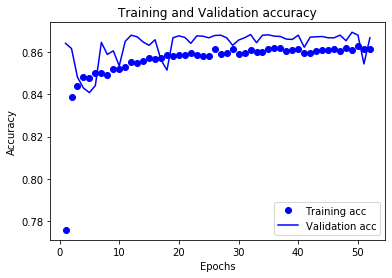

In [ ]:
#図を消去
#ドットは訓練データでの結果、折れ線は検証データでの結果
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()